In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('spam.csv',error_bad_lines=False, encoding='latin-1')

C:\Users\HP\anaconda3\envs\nlpproject\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [7]:
df.sample()

,v1,v2
780,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...


In [8]:
# Rename the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# check missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#check duplicate
df.duplicated().sum()

403

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

## EDA

In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [20]:
import matplotlib.pyplot as plt


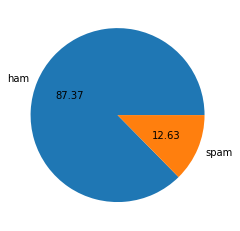

In [21]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [22]:
# Data is imbalanced

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters']=df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# number of words

In [28]:
df['text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [29]:
df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [30]:
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['text'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [33]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [34]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [36]:
#ham sms
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [37]:
#spam sms
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [38]:
import seaborn as sns


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

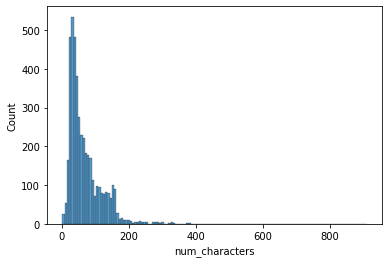

In [39]:
sns.histplot(df[df['target']==0]['num_characters'])

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

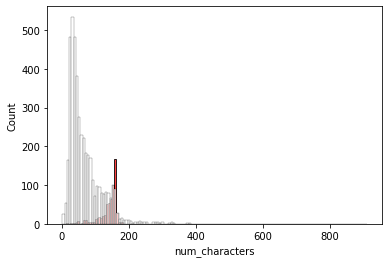

In [40]:
sns.histplot(df[df['target']==1]['num_characters'],color='red')
sns.histplot(df[df['target']==0]['num_characters'], color='white')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

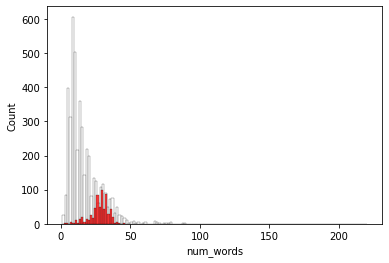

In [41]:
sns.histplot(df[df['target']==0]['num_words'], color='white')
sns.histplot(df[df['target']==1]['num_words'],color='red')


<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

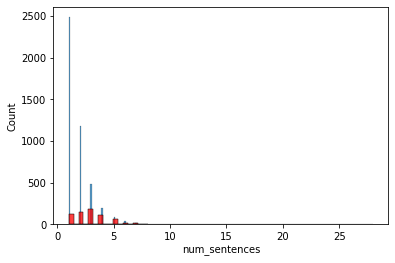

In [42]:
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')


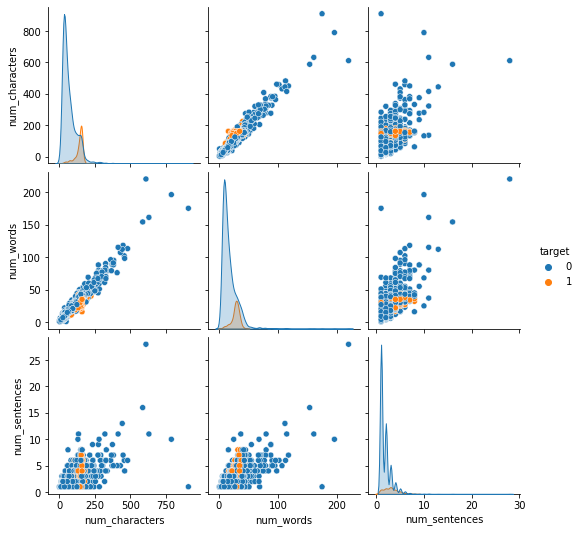

In [43]:
sns.pairplot(df,hue='target')

In [44]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

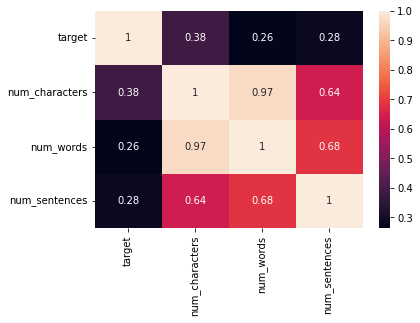

In [45]:
sns.heatmap(df.corr(),annot=True)

## Data Preprocessing 

 1.  lower case
 2.  tokenization
 3.  removing special characters
 4.  removing stop words and punctuation
 5.  stemming

In [65]:
import string

In [66]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [74]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")


'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [73]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [62]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [58]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [75]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [76]:
df['transfromed_text']=df['text'].apply(transform_text)

In [77]:
df.head()

,target,text,num_characters,num_words,num_sentences,transfromed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [83]:
import wordcloud

In [85]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [88]:
spam_wc=wc.generate(df[df['target']==1]['transfromed_text'].str.cat(sep=" "))

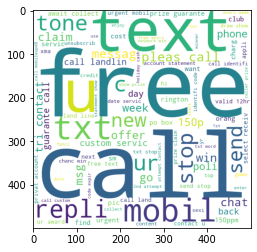

In [89]:
plt.imshow(spam_wc)

In [90]:
ham_wc=wc.generate(df[df['target']==0]['transfromed_text'].str.cat(sep=" "))

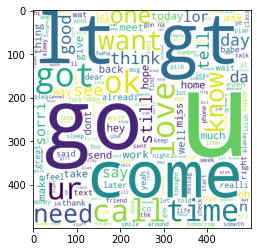

In [91]:
plt.imshow(ham_wc)

In [92]:
df.head()

,target,text,num_characters,num_words,num_sentences,transfromed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [94]:
spam_corpus = []
for msg in df[df['target'] == 1]['transfromed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [96]:
len(spam_corpus)

9939

C:\Users\HP\anaconda3\envs\nlpproject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

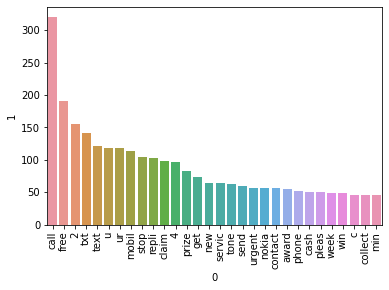

In [103]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show

In [105]:
ham_corpus = []
for msg in df[df['target'] == 0]['transfromed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [106]:
len(ham_corpus)

35394

C:\Users\HP\anaconda3\envs\nlpproject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


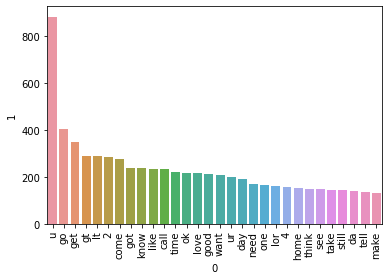

In [107]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [108]:
df.head()

,target,text,num_characters,num_words,num_sentences,transfromed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Model Building

In [110]:
# Text Vectorization
# using Bag of Words


In [112]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [113]:
x=cv.fit_transform(df['transfromed_text']).toarray(

)

In [114]:
x.shape

(5169, 6708)

In [115]:
y=df['target'].values

In [116]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [134]:
from sklearn.model_selection import train_test_split


In [135]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [136]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [137]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [138]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [139]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [140]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [130]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [132]:
X = tfidf.fit_transform(df['transfromed_text']).toarray()

In [133]:
X.shape

(5169, 3000)

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [143]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [144]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [145]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [146]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9284332688588007, 0.7580645161290323)

In [147]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9284332688588007
Precision -  0.7580645161290323
For  KN
Accuracy -  0.90715667311412
Precision -  1.0
For  NB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For  DT
Accuracy -  0.9245647969052224
Precision -  0.9166666666666666
For  LR
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.9464285714285714
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.9159663865546218
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9914529914529915
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9444444444444444


C:\Users\HP\anaconda3\envs\nlpproject\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:55:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  xgb
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406


In [148]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
5,RF,0.971954,1.000000
8,ETC,0.977756,0.991453
10,xgb,0.974855,0.974576
4,LR,0.970986,0.973684
6,AdaBoost,0.963250,0.946429
9,GBDT,0.943907,0.944444
3,DT,0.924565,0.916667
7,BgC,0.962282,0.915966
2,NB,0.964217,0.834437


In [149]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.907157
1,RF,Accuracy,0.971954
2,ETC,Accuracy,0.977756
3,xgb,Accuracy,0.974855
4,LR,Accuracy,0.970986
5,AdaBoost,Accuracy,0.963250
6,GBDT,Accuracy,0.943907
7,DT,Accuracy,0.924565
8,BgC,Accuracy,0.962282
9,NB,Accuracy,0.964217


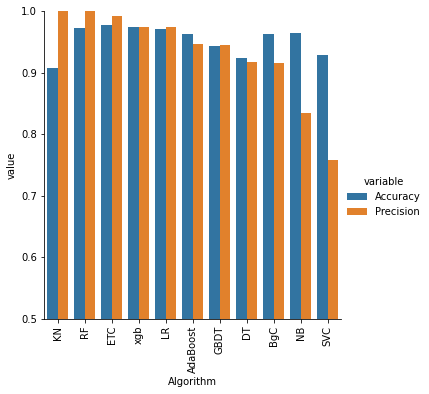

In [150]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### model improve

In [151]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [152]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [153]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [154]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [155]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [156]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000
1,RF,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
2,ETC,0.977756,0.991453,0.977756,0.991453,0.977756,0.991453,0.977756,0.991453
3,xgb,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
4,LR,0.970986,0.973684,0.970986,0.973684,0.970986,0.973684,0.970986,0.973684
5,AdaBoost,0.963250,0.946429,0.963250,0.946429,0.963250,0.946429,0.963250,0.946429
6,GBDT,0.943907,0.944444,0.943907,0.944444,0.943907,0.944444,0.943907,0.944444
7,DT,0.924565,0.916667,0.924565,0.916667,0.924565,0.916667,0.924565,0.916667
8,BgC,0.962282,0.915966,0.962282,0.915966,0.962282,0.915966,0.962282,0.915966
9,NB,0.964217,0.834437,0.964217,0.834437,0.964217,0.834437,0.964217,0.834437


In [157]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [158]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [159]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [160]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.976


In [161]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [162]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [163]:
from sklearn.ensemble import StackingClassifier

In [164]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [165]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9545454545454546
